In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import module
import module_glasso
from module_glasso import *
import importlib
importlib.reload(module_glasso)
import readpng as rpng
import colorvector

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
img=rpng.get_img("./car.png")

In [3]:
np.shape(img)

(366, 408, 3)

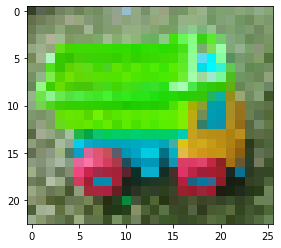

In [5]:
fig=plt.figure()

#timg=img[100:175,100:250]
#timg=img[100:175:2,100:250:2]
timg=img[::16,::16,:]
plt.imshow(timg)

In [10]:
Nx, Ny, Nrgb = np.shape(timg)
N_data = 100
rand_now = module.random_generator(N_data, Nx, Ny)
dRGB, g=rand_now.make_colordata(timg,20) 
g=np.array(g)

In [133]:
rgbvec=colorvector.generate_palette(8)

In [134]:
Npal=np.shape(rgbvec)[0]
print(Npal)

100


In [135]:
I_init=np.ones((Nx,Ny,Npal))
gall=np.einsum("ijk,cl->ijkcl",g,rgbvec)
 #ijkcl


In [136]:
print(np.shape(g),np.shape(dRGB),np.shape(rgbvec),np.shape(gall),np.shape(I_init)) #(i, j, k), (i, l), (c, l),(ijkcl),(jkc)

(100, 23, 26) (100, 3) (100, 3) (100, 23, 26, 100, 3) (23, 26, 100)


In [137]:
yR = mfista_func(I_init, dRGB, gall, lambda_gl= 1e2, print_func=True)


Current iteration: 0/10000,  L: 1890591.424713, cost: 56365482003.436340, cost_chiquare:145325999.778739
Current iteration: 50/10000,  L: 1562472.251829, cost: 45504.130658, cost_chiquare:21134.405284
Current iteration: 100/10000,  L: 1420429.319844, cost: 22203.748862, cost_chiquare:2006.392633
Current iteration: 150/10000,  L: 1562472.251829, cost: 19495.431792, cost_chiquare:542.381138
Current iteration: 200/10000,  L: 1562472.251829, cost: 17648.437367, cost_chiquare:133.458070
Current iteration: 250/10000,  L: 1420429.319844, cost: 15872.383113, cost_chiquare:55.628918
Current iteration: 300/10000,  L: 1562472.251829, cost: 13950.408734, cost_chiquare:34.860350
Current iteration: 350/10000,  L: 1562472.251829, cost: 11929.221409, cost_chiquare:23.297208
Current iteration: 400/10000,  L: 1562472.251829, cost: 9924.553016, cost_chiquare:18.446066
Current iteration: 450/10000,  L: 1562472.251829, cost: 8031.042429, cost_chiquare:17.431463
Current iteration: 500/10000,  L: 1420429.319

In [138]:
np.shape(yR)

(23, 26, 100)

In [139]:
crit=1.e-2
mask=np.sum(yR[:,:,:],axis=(0,1))>crit
ysel=yR[:,:,mask]
print(np.shape(yR),np.shape(ysel))
#for i in range(0,np.shape(yR)[2]):
#    print(np.sum(yR[:,:,i]),np.std(yR[:,:,i]))

#y=np.array([yR.T,yG.T,yB.T]).T
#np.shape(y)

(23, 26, 100) (23, 26, 83)


In [140]:
ypredrgb=np.einsum("cl,jkc->jkl",rgbvec[mask,:],ysel)

In [141]:
np.shape(Ipred),np.shape(ypredrgb),np.shape(rgbvec[mask,:])

((100, 3), (23, 26, 3), (83, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


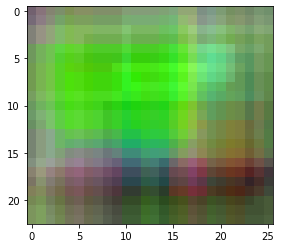

In [142]:
plt.imshow(ypredrgb)

In [143]:
np.shape(timg)

(23, 26, 3)

install colour package
pip install colour-science

In [144]:
import colour 
from colour.plotting import *
import itertools

In [145]:
#line = np.linspace(0.0, 1.0, 15, endpoint=True)
#rgb = np.array(list(itertools.product(line,line,line)), dtype=np.float)


In [146]:
np.shape(yi),np.shape(ti)
np.max(yi),np.max(ti)

(0.99380798999990649, 1.0)

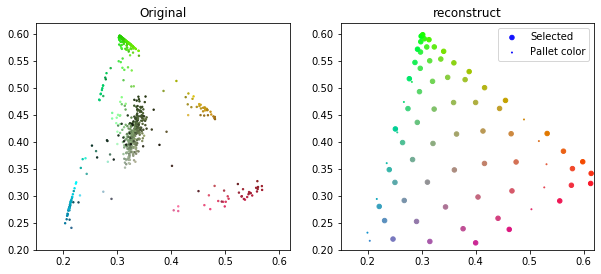

In [147]:
#XYZからxyへ変換
ti=timg.reshape(np.shape(timg)[0]*np.shape(timg)[1],3)
XYZ = colour.sRGB_to_XYZ(ti)
xy = colour.XYZ_to_xy(XYZ)

#CIE_1931_chromaticity_diagram_colours_plot(bounding_box=(-0.1, 0.9, -0.1, 0.9), standalone=False)
#plot_chromaticity_diagram_CIE1931(bounding_box=(0.15, 0.65, 0.15, 0.65), standalone=False)
#sRGB領域へプロット
#plt.plot(xy[:,0], xy[:,1], 'o', markersize=2, label="sRGB",color="gray",alpha=0.2)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=ti,alpha=1,s=2)
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("Original")
#plt.legend() 

yi=rgbvec[mask,:]
XYZ = colour.sRGB_to_XYZ(yi)
xy = colour.XYZ_to_xy(XYZ)
yi[yi>1]=1.0
yi[yi<0]=0


yic=rgbvec[:,:]
XYZc = colour.sRGB_to_XYZ(yic)
xyc = colour.XYZ_to_xy(XYZc)
yic[yic>1]=1.0
yic[yic<0]=0

ax=fig.add_subplot(122,aspect=1.0)
ax.scatter(xy[:,0], xy[:,1],facecolors=yi,alpha=1,s=20,label="Selected")
ax.scatter(xyc[:,0], xyc[:,1],facecolors=yic,alpha=1,s=1,label="Pallet color")
plt.legend()
ax.set_xlim(0.15,0.62)
ax.set_ylim(0.2,0.62)
ax.set_title("reconstruct")
display(standalone=True)